# Cake Eating problem

In [16]:
# Import section
using Interpolations
using Plots
using Optim

In [17]:
# Utility function
u(a) = log(a);

In [18]:
# Number of gridpoints
grid = 100;

# Parameters 
β = 0.7;

# Evenly spaced discretized state space
S = LinRange(0.01, 1, grid);
zero = zeros(grid);

In [19]:
# Linear Interpolation of the value function

V = LinearInterpolation(S, zero, extrapolation_bc = Line());

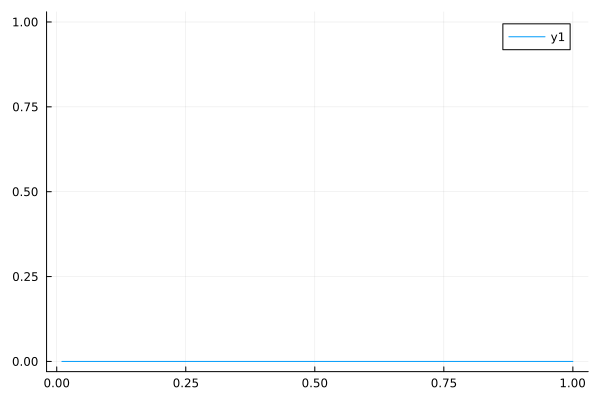

In [20]:
# Plot of the initial guess

plot(S, V(S))

In [21]:
# Define Bellman Operator
function T(v)

    # Instantiate Tv and a
    Tv = zeros(grid)
    a = zeros(grid)

    # for each point in the domain
    for i in 1:length(zero)

        # Right hand side of the bellman eq
        rhs(a) = - u(a) - β*v(S[i] - a)
        result = optimize(rhs, 0, S[i])

        # Assign values
        Tv[i] = -Optim.minimum(result)
        a[i] = Optim.minimizer(result)[1]
    end
    
    return Tv, a
end

T (generic function with 1 method)

In [22]:
# Try one iteration
tv, a = T(V)

([-4.605170201040227, -3.912023020480293, -3.5065579123721324, -3.2188758399203534, -2.995732288606145, -2.813410731812191, -2.659260051984933, -2.5257286593604107, -2.4079456237040278, -2.302585108046202  …  -0.09431069452339946, -0.08338162399120908, -0.07257070788699357, -0.06187541877024539, -0.05129330943970858, -0.04082200957241318, -0.03045922253686672, -0.020202722369677514, -0.010050350905659512, -1.5052158077773952e-8], [0.009999999849478641, 0.019999999698957063, 0.02999999954843548, 0.0399999993979139, 0.04999999924739231, 0.05999999909687073, 0.06999999894634916, 0.07999999879582757, 0.08999999864530599, 0.0999999984947844  …  0.9099999863025362, 0.9199999861520147, 0.929999986001493, 0.9399999858509717, 0.94999998570045, 0.9599999855499284, 0.9699999853994067, 0.9799999852488852, 0.9899999850983636, 0.999999984947842])

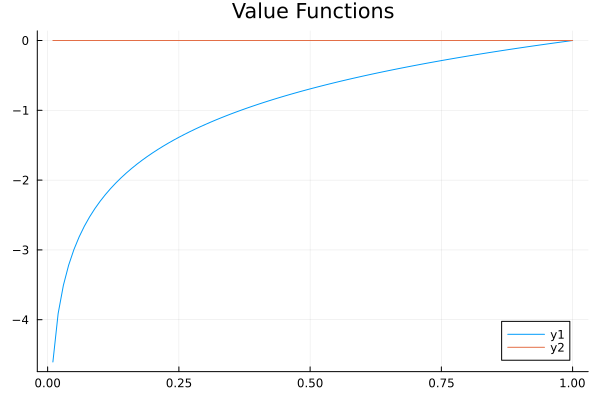

In [23]:
# Plot after the first iteration
plot(S, tv, title="Value Functions")
plot!(S, V(S))

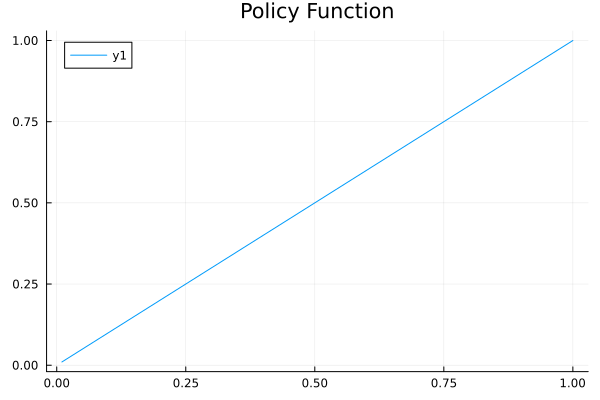

In [24]:
plot(S, a, title="Policy Function")

In [25]:
# Set tolerance and error 
ε = 1e-07;
err = Inf;

In [26]:
# Solver
plots = []
while err > ε

    # Apply the operator and get the new value function
    v_new, a = T(V)
    push!(plots, v_new)

    # Compute the error 
    err = maximum(broadcast(abs, (v_new - V(S))))

    # Re-interpolate the value function
    V = LinearInterpolation(S, v_new, extrapolation_bc = Line());
end
print(err)

9.528839939321188e-8

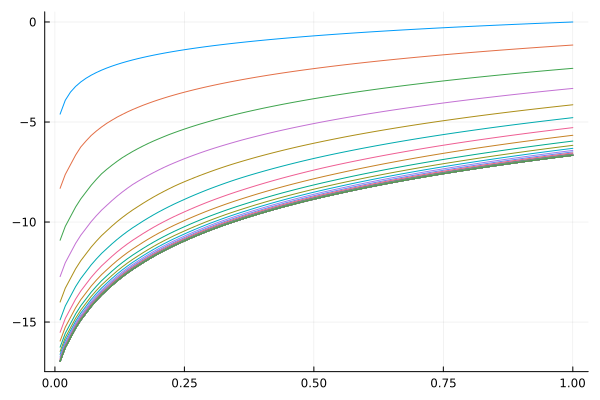

In [27]:
p = plot(S, plots[1], label = "")
for i in 2:length(plots)
    plot!(S,plots[i], label = "")
end
display(p)

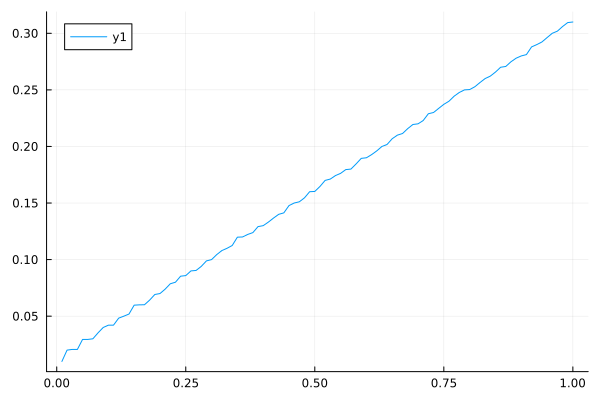

In [28]:
plot(S, a)